### Project goal
The goal of this project is to predict the number of injuries per game using factors like weather, field type, and environmental metrics.

### EDA
Next, we will load the dataset and explore its structure to understand the data better.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Datasets

In [128]:
injury_data = pd.read_csv("../data/raw/InjuryRecord.csv")
play_list = pd.read_csv("../data/raw/PlayList.csv")

### Injury Data Columns
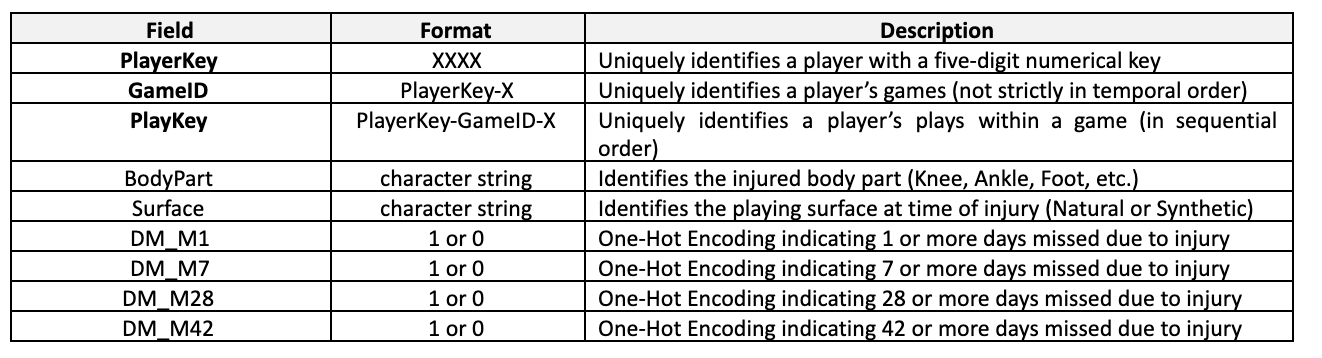
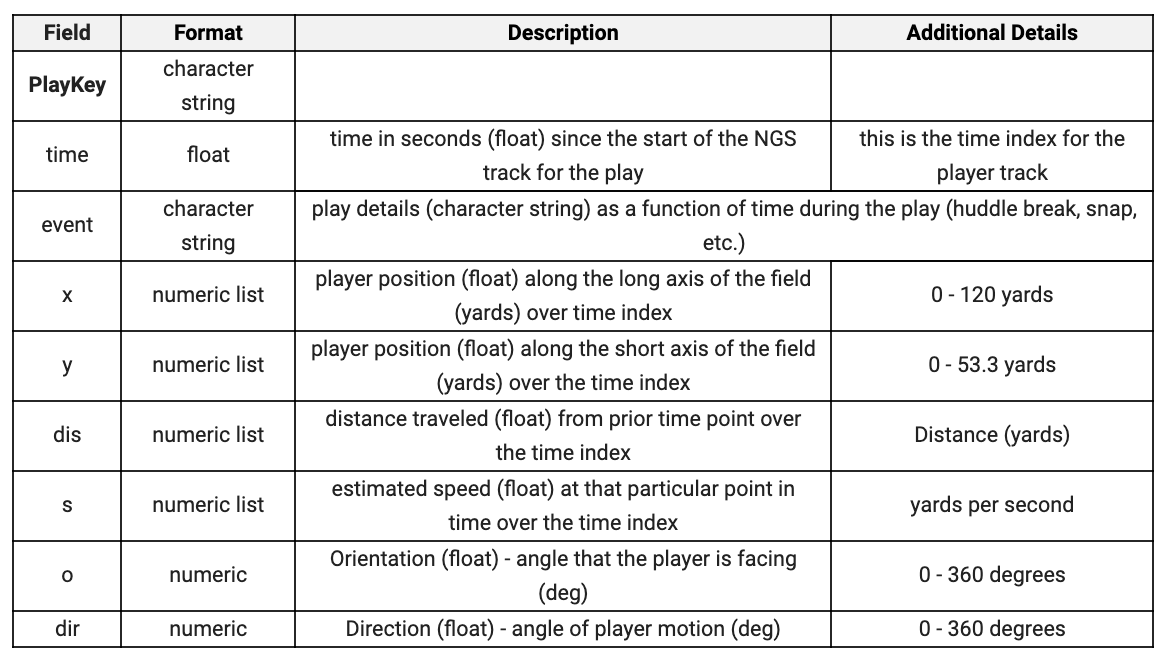

### Play List Columns
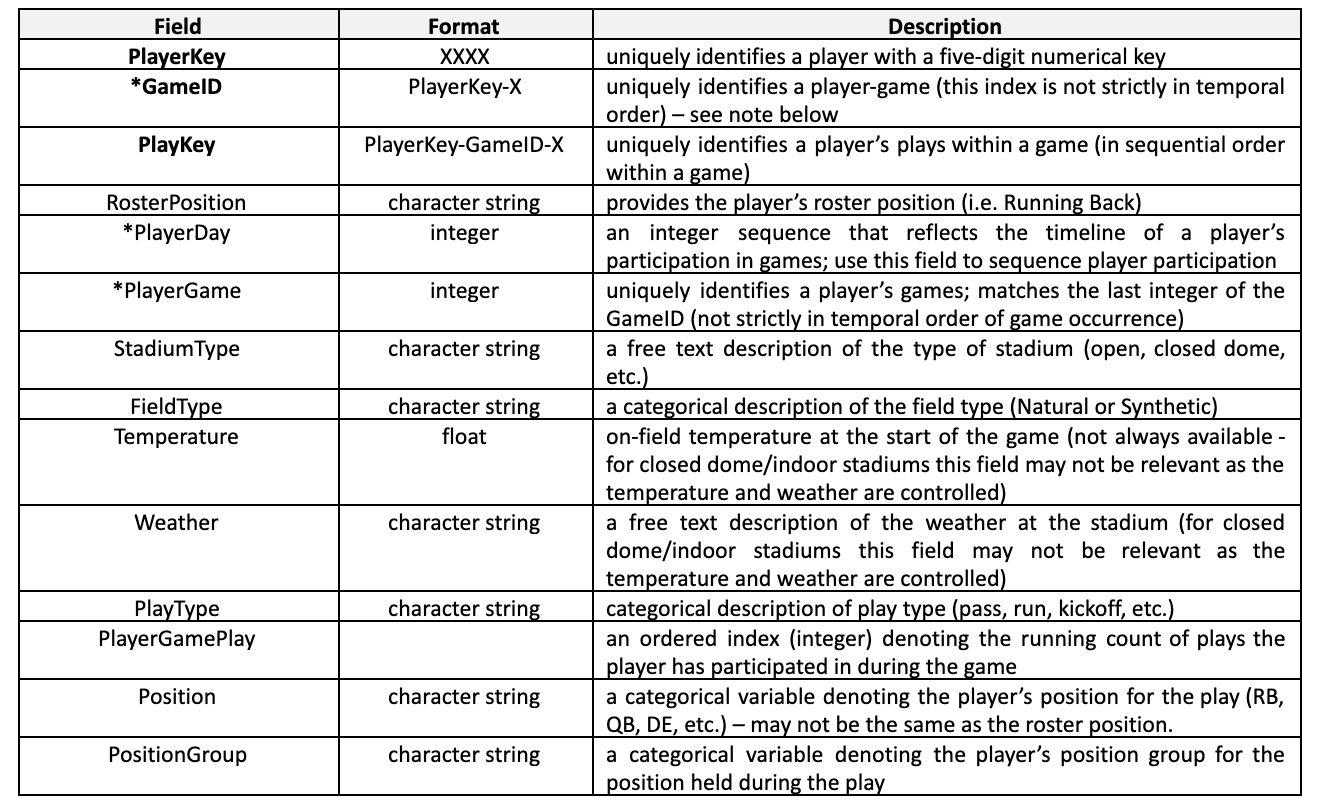

### Examine the Data Available

In [129]:
injury_data.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1


In [130]:
play_list.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


In [131]:
injury_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PlayerKey  105 non-null    int64 
 1   GameID     105 non-null    object
 2   PlayKey    77 non-null     object
 3   BodyPart   105 non-null    object
 4   Surface    105 non-null    object
 5   DM_M1      105 non-null    int64 
 6   DM_M7      105 non-null    int64 
 7   DM_M28     105 non-null    int64 
 8   DM_M42     105 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 7.5+ KB


In [132]:
play_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267005 entries, 0 to 267004
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PlayerKey       267005 non-null  int64 
 1   GameID          267005 non-null  object
 2   PlayKey         267005 non-null  object
 3   RosterPosition  267005 non-null  object
 4   PlayerDay       267005 non-null  int64 
 5   PlayerGame      267005 non-null  int64 
 6   StadiumType     250095 non-null  object
 7   FieldType       267005 non-null  object
 8   Temperature     267005 non-null  int64 
 9   Weather         248314 non-null  object
 10  PlayType        266638 non-null  object
 11  PlayerGamePlay  267005 non-null  int64 
 12  Position        267005 non-null  object
 13  PositionGroup   267005 non-null  object
dtypes: int64(5), object(9)
memory usage: 28.5+ MB


In [133]:
injury_data.describe()

,PlayerKey,DM_M1,DM_M7,DM_M28,DM_M42
count,105.000000,105.0,105.000000,105.000000,105.000000
mean,42283.609524,1.0,0.723810,0.352381,0.276190
std,4163.510366,0.0,0.449257,0.480003,0.449257
min,31070.000000,1.0,0.000000,0.000000,0.000000
25%,39656.000000,1.0,0.000000,0.000000,0.000000
50%,43518.000000,1.0,1.000000,0.000000,0.000000
75%,45966.000000,1.0,1.000000,1.000000,1.000000
max,47813.000000,1.0,1.000000,1.000000,1.000000


In [134]:
play_list.describe()

,PlayerKey,PlayerDay,PlayerGame,Temperature,PlayerGamePlay
count,267005.000000,267005.000000,267005.000000,267005.000000,267005.000000
mean,41515.381465,210.451351,13.799131,-35.029535,29.058647
std,4125.858924,183.643654,8.342894,304.583110,19.626551
min,26624.000000,-62.000000,1.000000,-999.000000,1.000000
25%,39653.000000,43.000000,7.000000,44.000000,13.000000
50%,42432.000000,102.000000,13.000000,61.000000,26.000000
75%,44480.000000,400.000000,20.000000,72.000000,43.000000
max,47888.000000,480.000000,32.000000,97.000000,102.000000


### Combine both Datasets

In [135]:
combined_data = pd.merge(injury_data, play_list, on=['PlayerKey', 'GameID', 'PlayKey'], how='inner')
combined_data.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,Linebacker,29,4,Indoors,Synthetic,84,Cloudy,Punt,32,OLB,LB
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,Linebacker,50,7,Open,Natural,76,Partly Cloudy,Punt,26,OLB,LB
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1,Safety,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,70,SS,DB
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0,Linebacker,15,3,Outdoor,Natural,80,Cloudy,Punt,30,LB,LB
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1,Wide Receiver,32,5,Retractable Roof,Synthetic,89,Partly Cloudy,Kickoff,69,WR,WR


In [136]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PlayerKey       77 non-null     int64 
 1   GameID          77 non-null     object
 2   PlayKey         77 non-null     object
 3   BodyPart        77 non-null     object
 4   Surface         77 non-null     object
 5   DM_M1           77 non-null     int64 
 6   DM_M7           77 non-null     int64 
 7   DM_M28          77 non-null     int64 
 8   DM_M42          77 non-null     int64 
 9   RosterPosition  77 non-null     object
 10  PlayerDay       77 non-null     int64 
 11  PlayerGame      77 non-null     int64 
 12  StadiumType     73 non-null     object
 13  FieldType       77 non-null     object
 14  Temperature     77 non-null     int64 
 15  Weather         74 non-null     object
 16  PlayType        77 non-null     object
 17  PlayerGamePlay  77 non-null     int64 
 18  Position    

### Data Cleaning

In [137]:
combined_data.drop_duplicates(inplace=True)
combined_data

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,Linebacker,29,4,Indoors,Synthetic,84,Cloudy,Punt,32,OLB,LB
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,Linebacker,50,7,Open,Natural,76,Partly Cloudy,Punt,26,OLB,LB
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1,Safety,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,70,SS,DB
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0,Linebacker,15,3,Outdoor,Natural,80,Cloudy,Punt,30,LB,LB
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1,Wide Receiver,32,5,Retractable Roof,Synthetic,89,Partly Cloudy,Kickoff,69,WR,WR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,42418,42418-19,42418-19-15,Ankle,Synthetic,1,0,0,0,Offensive Lineman,442,19,Retr. Roof - Closed,Synthetic,57,Mostly cloudy,Rush,15,C,OL
73,46394,46394-18,46394-18-3,Knee,Synthetic,1,1,0,0,Tight End,393,18,Outdoor,Synthetic,45,Cloudy,Kickoff Returned,3,TE,TE
74,45187,45187-9,45187-9-4,Ankle,Natural,1,0,0,0,Wide Receiver,327,9,Outdoor,Natural,81,Cloudy,Rush,4,WR,WR
75,42448,42448-14,42448-14-3,Knee,Synthetic,1,1,1,0,Wide Receiver,379,14,Retractable Roof,Synthetic,78,Partly Cloudy,Pass,3,WR,WR


In [138]:
# Check for missing values
missing_values = combined_data.isnull().sum()
missing_values[missing_values > 0]


StadiumType    4
Weather        3
dtype: int64

In [139]:
for col in ['BodyPart', 'Surface', 'RosterPosition', 'StadiumType', 'FieldType', 'Weather', 'Position', 'PlayType']:
  print(f"Unique values in {col}: {combined_data[col].unique()}\n")

Unique values in BodyPart: ['Knee' 'Ankle' 'Foot']

Unique values in Surface: ['Synthetic' 'Natural']

Unique values in RosterPosition: ['Linebacker' 'Safety' 'Wide Receiver' 'Running Back' 'Offensive Lineman'
 'Defensive Lineman' 'Cornerback' 'Tight End']

Unique values in StadiumType: ['Indoors' 'Open' 'Outdoor' 'Retractable Roof' 'Indoor' 'Dome' 'Outddors'
 'Outdoors' 'Retr. Roof-Closed' nan 'Closed Dome' 'Oudoor'
 'Indoor, Roof Closed' 'Indoor, Open Roof' 'Retr. Roof - Open'
 'Domed, closed' 'Retr. Roof - Closed']

Unique values in FieldType: ['Synthetic' 'Natural']

Unique values in Weather: ['Cloudy' 'Partly Cloudy' 'Clear and warm' 'Sunny' 'Indoor' 'Clear' nan
 'Controlled Climate' 'Cold'
 'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.'
 'Sun & clouds' 'Indoors' 'Rain' 'Coudy' 'Mostly sunny' 'Fair'
 'Cloudy, 50% change of rain' 'Light Rain' 'Mostly Sunny' 'Clear Skies'
 'Rain shower' 'Clear skies' 'Cloudy and Cool' 'Mostly cloudy']

Unique valu

### Replacing null values in StadiumType column

In [140]:
stadium_mapping = play_list.groupby('GameID')['StadiumType'].first()
stadium_mapping

GameID
26624-1      Outdoor
26624-10     Outdoor
26624-11     Outdoor
26624-12    Outdoors
26624-13     Outdoor
              ...   
47888-5     Outdoors
47888-6      Outdoor
47888-7     Outdoors
47888-8      Outdoor
47888-9      Outdoor
Name: StadiumType, Length: 5712, dtype: object

In [141]:
combined_data['StadiumType'] = combined_data['StadiumType'].fillna(combined_data['PlayKey'].map(stadium_mapping))
combined_data['StadiumType'].isnull().sum()

np.int64(4)

In [142]:
### Replace missing values in 'Weather' with the most common value
field_type_mapping = play_list.groupby('PlayKey')['Weather'].first()
combined_data['Weather'] = combined_data['Weather'].fillna(combined_data['PlayKey'].map(field_type_mapping))
combined_data['Weather'].isnull().sum()

np.int64(3)

### Standardizing the StadiumType column

In [143]:
stadium_mapping = {
    'Indoors': 'Indoors', 'Indoor': 'Indoors', 'Indoor, Roof Closed': 'Indoors',
    'Dome': 'Closed', 'Closed Dome': 'Closed', 'Domed, closed': 'Closed',
    'Retractable Roof': 'Closed', 'Retr. Roof-Closed': 'Closed', 'Retr. Roof - Closed': 'Closed',
    'Retr. Roof - Open': 'Open', 'Indoor, Open Roof': 'Open',
    'Open': 'Open', 'Outdoor': 'Open', 'Outdoors': 'Open', 'Outddors': 'Open', 'Oudoor': 'Open'
}

combined_data['StadiumType'] = combined_data['StadiumType'].map(stadium_mapping)
combined_data['StadiumType']

0     Indoors
1        Open
2        Open
3        Open
4      Closed
       ...   
72     Closed
73       Open
74       Open
75     Closed
76    Indoors
Name: StadiumType, Length: 77, dtype: object

### Replacing outliers in the Weather column


In [144]:
# Identify outliers in the column
outliers = combined_data['Temperature'] == -999
print(f"Number of outliers: {outliers.sum()}")

combined_data['Temperature'] = combined_data['Temperature'].replace(-999, np.nan)
combined_data.loc[outliers, 'Temperature']

# Replace outliers based on the temperature mapping from the play_list
# temperature_mapping = play_list.groupby('PlayKey')['Temperature'].first()
# combined_data['Temperature'] = combined_data['Temperature'].fillna(combined_data['PlayKey'].map(temperature_mapping))
# combined_data['Temperature'].isnull().sum()

Number of outliers: 7


8    NaN
16   NaN
20   NaN
25   NaN
26   NaN
36   NaN
50   NaN
Name: Temperature, dtype: float64

### Standardizing the Weather column

In [145]:
weather_mapping = {
  'Clear': 'Clear',
  'Clear Skies': 'Clear',
  'Clear skies': 'Clear',
  'Fair': 'Clear',
  'Clear and warm': 'Clear',
  'Partly Cloudy': 'Partly Cloudy',
  'Sun & clouds': 'Partly Cloudy',
  'Mostly Sunny': 'Partly Cloudy',
  'Mostly sunny': 'Partly Cloudy',
  'Cloudy': 'Cloudy',
  'Coudy': 'Cloudy',
  'Mostly cloudy': 'Cloudy',
  'Cloudy and Cool': 'Cloudy',
  'Rain': 'Rainy',
  'Light Rain': 'Rainy',
  'Rain shower': 'Rainy',
  'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.': 'Rainy',
  'Cloudy, 50% change of rain': 'Rainy',
  'Indoor': 'Indoor',
  'Indoors': 'Indoor',
  'Controlled Climate': 'Indoor',
  'Cold': 'Cold',
  'Sunny': 'Sunny'
}

combined_data['Weather'] = combined_data['Weather'].map(weather_mapping)
combined_data['Weather'].value_counts()

Weather
Cloudy           16
Partly Cloudy    14
Clear            12
Sunny            11
Indoor            9
Rainy             9
Cold              3
Name: count, dtype: int64

### Convert Days Missed to Injury Severity

In [146]:
combined_data["InjurySeverity"] = combined_data[["DM_M1", "DM_M7", "DM_M28", "DM_M42"]].mul([1, 7, 28, 42]).max(axis=1)
combined_data.drop(columns=["DM_M1", "DM_M7", "DM_M28", "DM_M42"], inplace=True)

In [147]:
combined_data.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup,InjurySeverity
0,39873,39873-4,39873-4-32,Knee,Synthetic,Linebacker,29,4,Indoors,Synthetic,84.0,Cloudy,Punt,32,OLB,LB,42
1,46074,46074-7,46074-7-26,Knee,Natural,Linebacker,50,7,Open,Natural,76.0,Partly Cloudy,Punt,26,OLB,LB,7
2,36557,36557-1,36557-1-70,Ankle,Synthetic,Safety,1,1,Open,Synthetic,63.0,Clear,Pass,70,SS,DB,42
3,46646,46646-3,46646-3-30,Ankle,Natural,Linebacker,15,3,Open,Natural,80.0,Cloudy,Punt,30,LB,LB,1
4,43532,43532-5,43532-5-69,Ankle,Synthetic,Wide Receiver,32,5,Closed,Synthetic,89.0,Partly Cloudy,Kickoff,69,WR,WR,42


In [148]:
combined_data.to_csv("../data/processed/combined_data_nfl_without_missing_values.csv", index=False)

### Plotting the Data

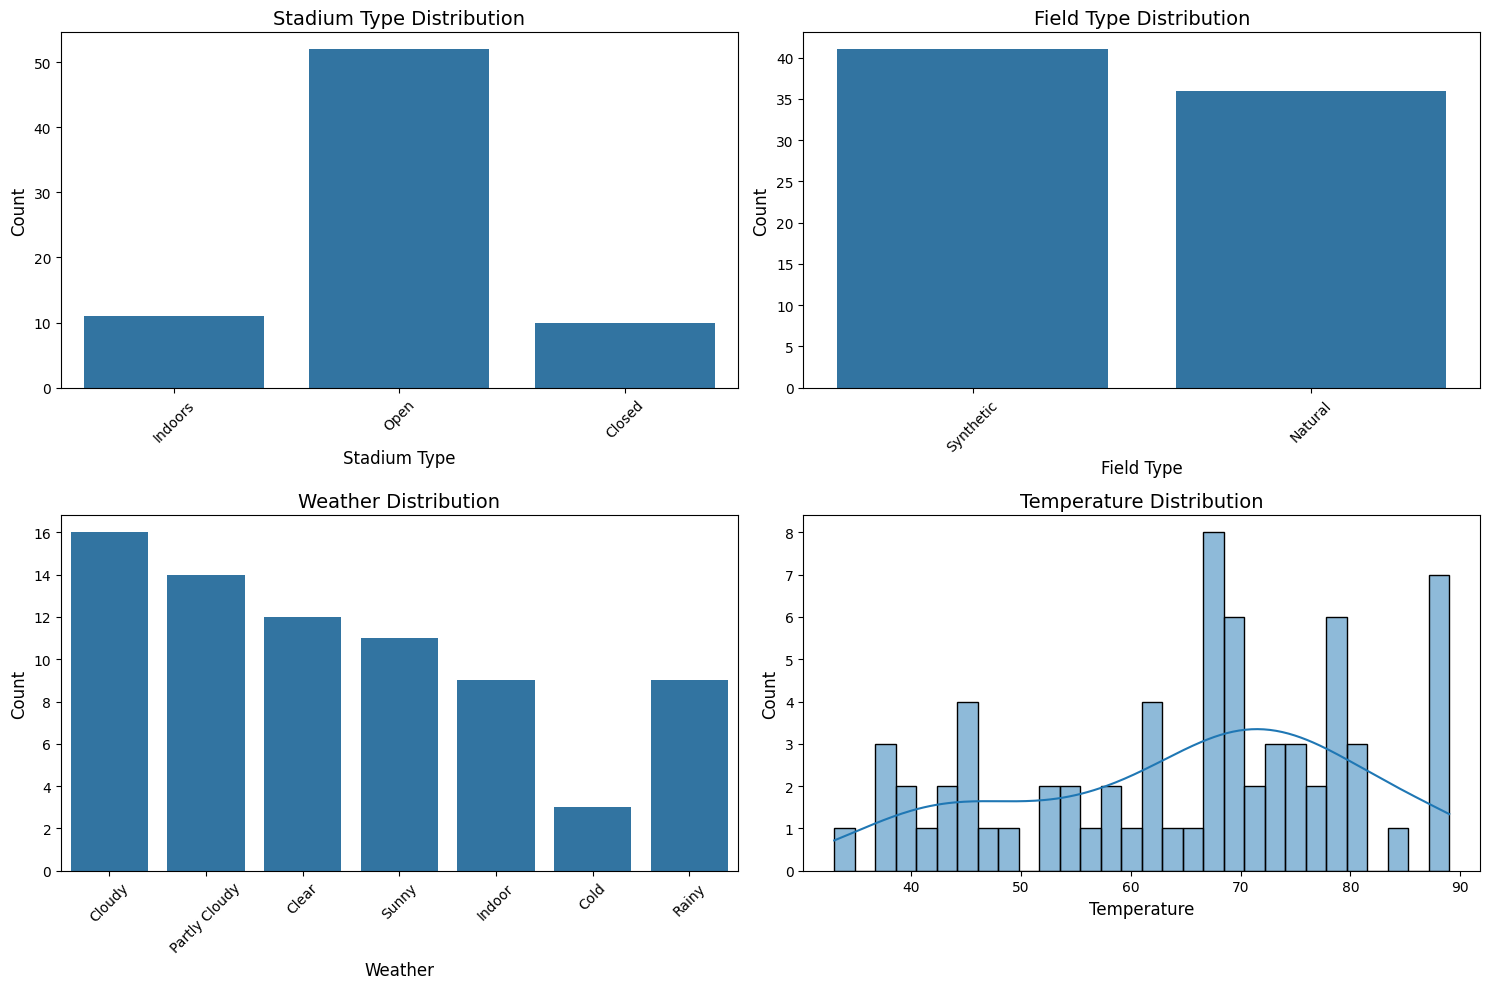

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# StadiumType
sns.countplot(data=combined_data, x='StadiumType', ax=axes[0, 0])
axes[0, 0].set_title('Stadium Type Distribution', fontsize=14)
axes[0, 0].set_xlabel('Stadium Type', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# FieldType
sns.countplot(data=combined_data, x='FieldType', ax=axes[0, 1])
axes[0, 1].set_title('Field Type Distribution', fontsize=14)
axes[0, 1].set_xlabel('Field Type', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# Weather
sns.countplot(data=combined_data, x='Weather', ax=axes[1, 0])
axes[1, 0].set_title('Weather Distribution', fontsize=14)
axes[1, 0].set_xlabel('Weather', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Temperature
sns.histplot(data=combined_data, x='Temperature', ax=axes[1, 1], bins=30, kde=True)
axes[1, 1].set_title('Temperature Distribution', fontsize=14)
axes[1, 1].set_xlabel('Temperature', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

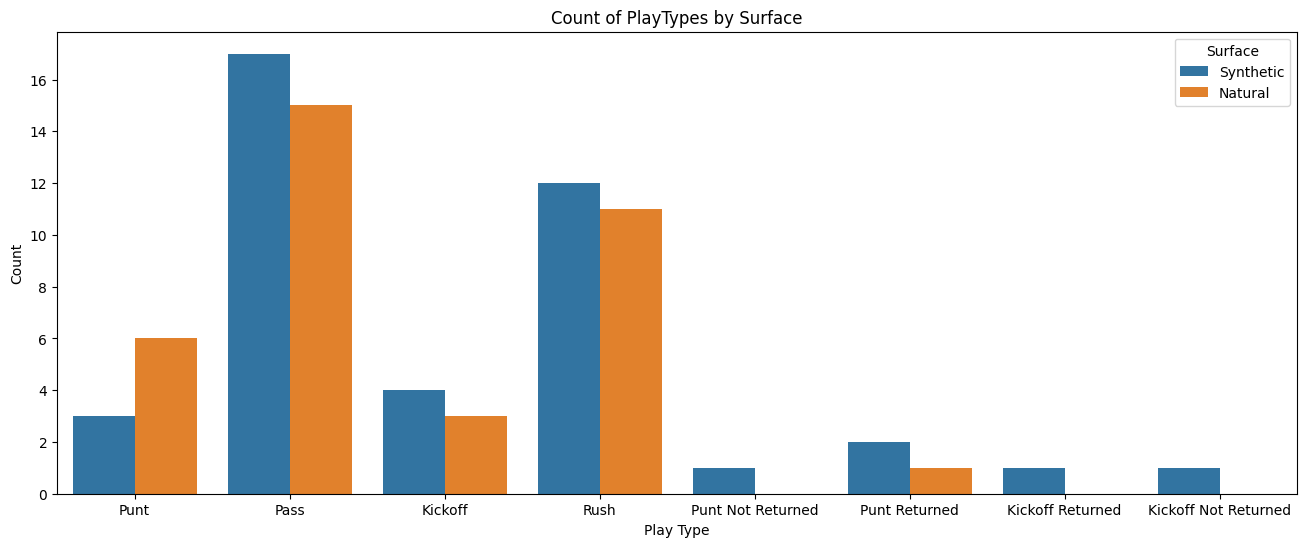

In [154]:
plt.figure(figsize=(16, 6))
sns.countplot(data=combined_data, x='PlayType', hue='Surface')
plt.title('Count of PlayTypes by Surface')
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.legend(title='Surface')
plt.show()

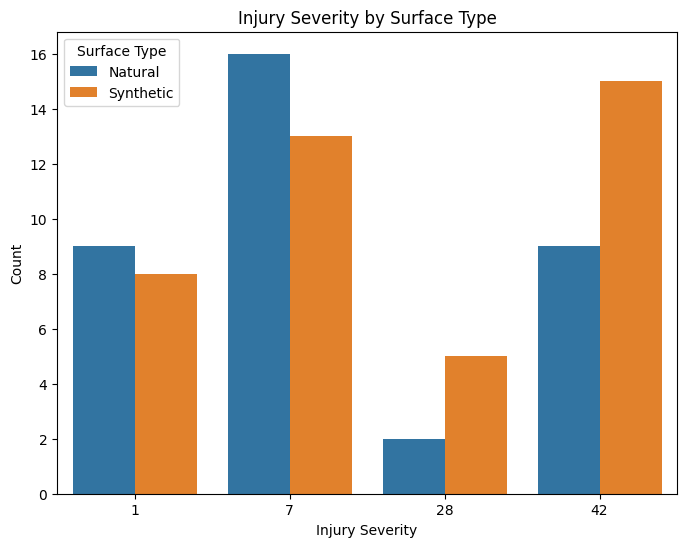

In [155]:
plt.figure(figsize=(8, 6))
sns.countplot(data=combined_data, x='InjurySeverity', hue='Surface')
plt.title('Injury Severity by Surface Type')
plt.xlabel('Injury Severity')
plt.ylabel('Count')
plt.legend(title='Surface Type')
plt.show()

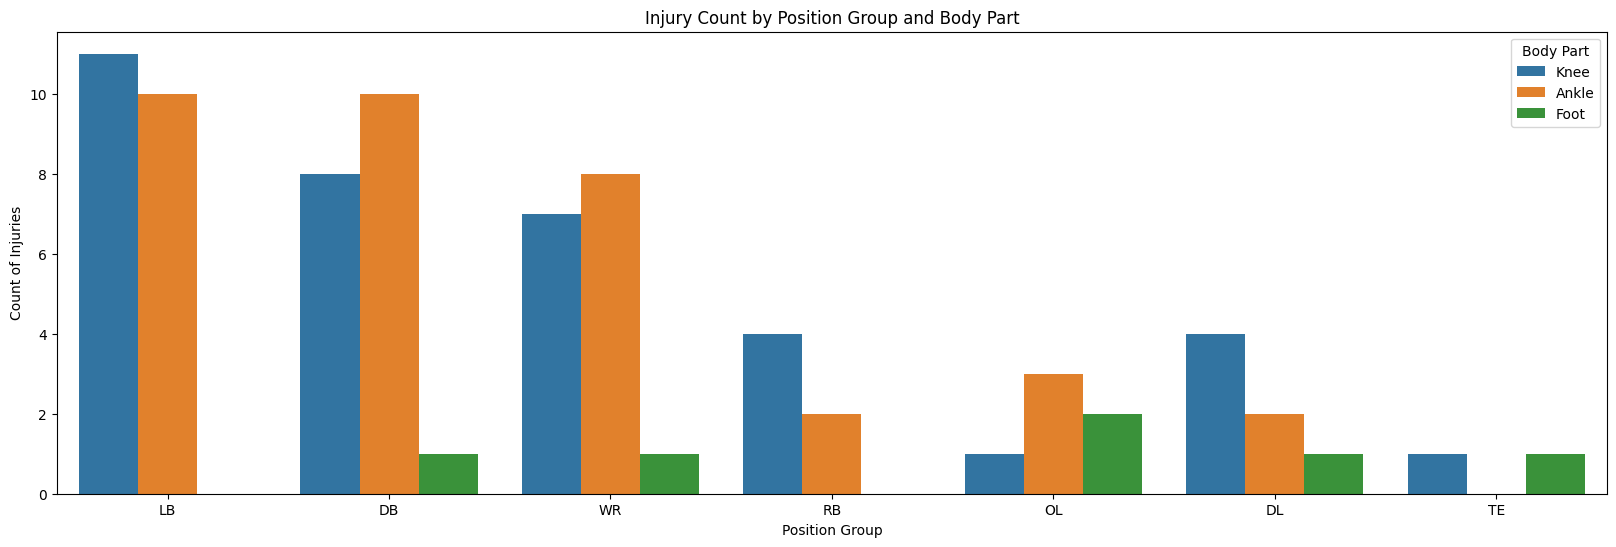

In [157]:
plt.figure(figsize=(20, 6))
sns.countplot(data=combined_data, x='PositionGroup', hue='BodyPart')
plt.title('Injury Count by Position Group and Body Part')
plt.xlabel('Position Group')
plt.ylabel('Count of Injuries')
plt.legend(title='Body Part')
plt.show()

In [160]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PlayerKey       77 non-null     int64  
 1   GameID          77 non-null     object 
 2   PlayKey         77 non-null     object 
 3   BodyPart        77 non-null     object 
 4   Surface         77 non-null     object 
 5   RosterPosition  77 non-null     object 
 6   PlayerDay       77 non-null     int64  
 7   PlayerGame      77 non-null     int64  
 8   StadiumType     73 non-null     object 
 9   FieldType       77 non-null     object 
 10  Temperature     70 non-null     float64
 11  Weather         74 non-null     object 
 12  PlayType        77 non-null     object 
 13  PlayerGamePlay  77 non-null     int64  
 14  Position        77 non-null     object 
 15  PositionGroup   77 non-null     object 
 16  InjurySeverity  77 non-null     int64  
dtypes: float64(1), int64(5), object(11)
m

### Standardizing numerical features

In [159]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
combined_data[['Temperature']] = scaler.fit_transform(
    combined_data[['Temperature']]
)
combined_data

,PlayerKey,GameID,PlayKey,BodyPart,Surface,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup,InjurySeverity
0,39873,39873-4,39873-4-32,Knee,Synthetic,Linebacker,29,4,Indoors,Synthetic,1.228777,Cloudy,Punt,32,OLB,LB,42
1,46074,46074-7,46074-7-26,Knee,Natural,Linebacker,50,7,Open,Natural,0.701081,Partly Cloudy,Punt,26,OLB,LB,7
2,36557,36557-1,36557-1-70,Ankle,Synthetic,Safety,1,1,Open,Synthetic,-0.156424,Clear,Pass,70,SS,DB,42
3,46646,46646-3,46646-3-30,Ankle,Natural,Linebacker,15,3,Open,Natural,0.964929,Cloudy,Punt,30,LB,LB,1
4,43532,43532-5,43532-5-69,Ankle,Synthetic,Wide Receiver,32,5,Closed,Synthetic,1.558586,Partly Cloudy,Kickoff,69,WR,WR,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,42418,42418-19,42418-19-15,Ankle,Synthetic,Offensive Lineman,442,19,Closed,Synthetic,-0.552196,Cloudy,Rush,15,C,OL,1
73,46394,46394-18,46394-18-3,Knee,Synthetic,Tight End,393,18,Open,Synthetic,-1.343739,Cloudy,Kickoff Returned,3,TE,TE,7
74,45187,45187-9,45187-9-4,Ankle,Natural,Wide Receiver,327,9,Open,Natural,1.030891,Cloudy,Rush,4,WR,WR,1
75,42448,42448-14,42448-14-3,Knee,Synthetic,Wide Receiver,379,14,Closed,Synthetic,0.833005,Partly Cloudy,Pass,3,WR,WR,28
